# Implementación del algóritmo de Evolución Diferencial
Para comenzar, se importa de la librería de numpy para poder trabajar con arreglos y random para los numeros aleatorios

importing Jupyter notebook from /Users/isaacg/Desktop/Maestría/Primer_Semestre/Algoritmos_Bioinspirados/Evolución Diferencial/utils/FuncionesObjetivo.ipynb


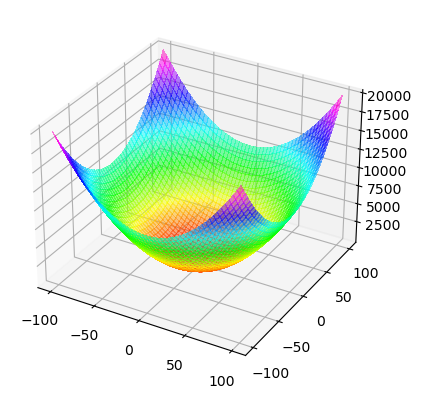

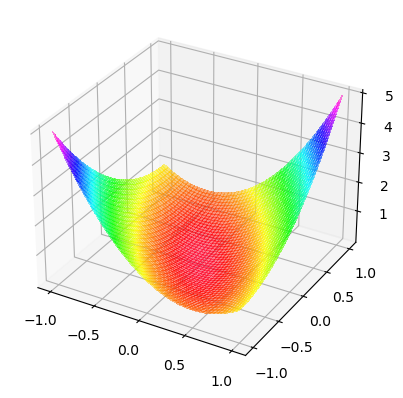

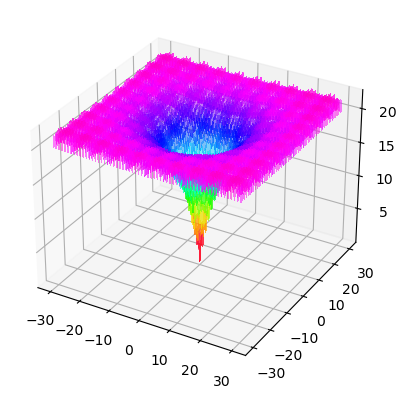

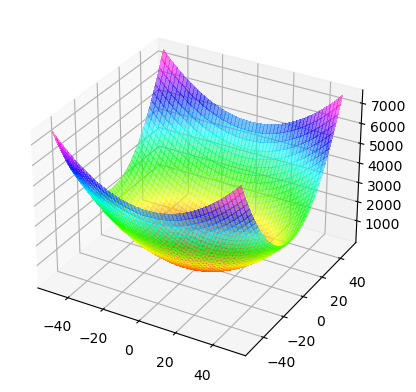

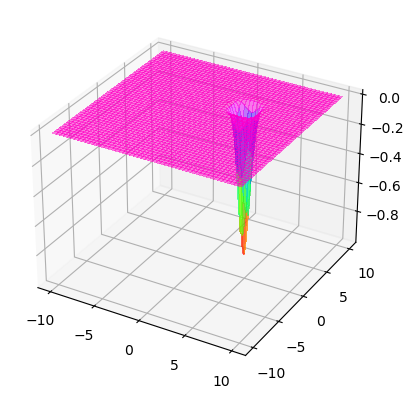

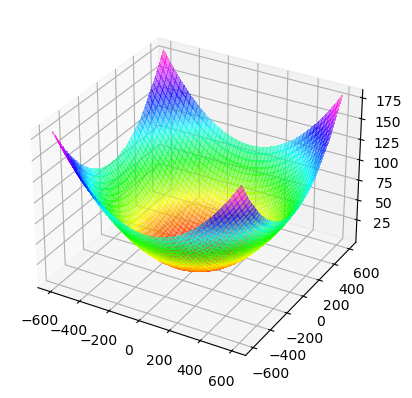

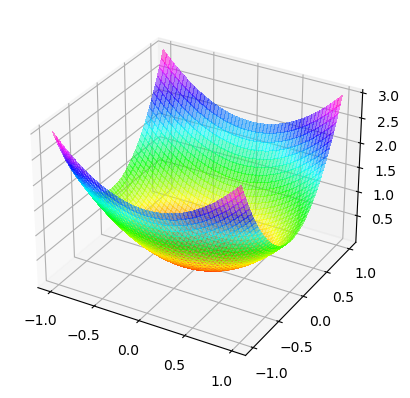

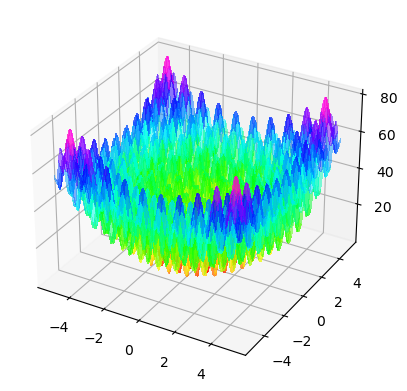

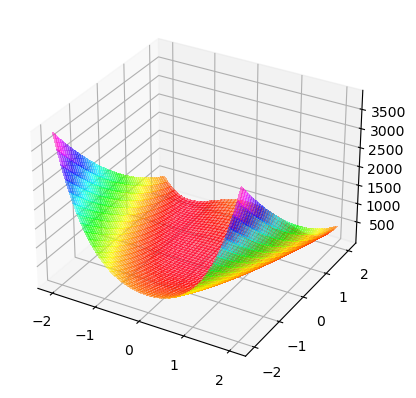

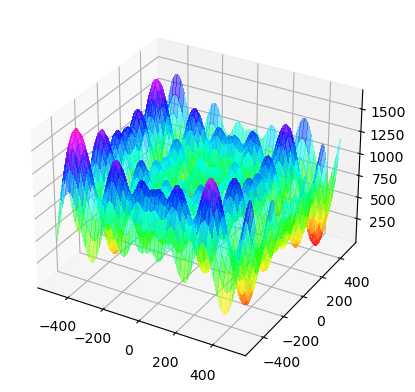

In [1]:
# Manejo de arreglos y operaciones matematicas
import numpy as np

# Importar funciones
import import_ipynb
from utils import FuncionesObjetivo as f

# Numeros aleatorios
import random

## Implementación de Funciones

### Funciones Generales


In [2]:
def mutacion(X, rango, F=0.5):
    """
    Esta funcion genera los vectores donadores para el cruzamiento
    input: 
        - X: poblacion actual
        - F: factor diferencial
        - rango: rango de cada dimension
    output: vectores donadores
    """
    vs = []
    for i in range(len(X)):
        # Elegir tres vectores aleatorios de X
        vecs = X[np.random.choice(range(len(X)), size=(3,), replace=False)]
        xp = vecs[0, :]
        xq = vecs[1, :]
        xr = vecs[2, :]

        # Generar vector donador
        v = xp + F * (xq - xr)

        # Clipear para evitar que los valores se salgan del rango
        v = np.clip(v, a_min=rango[:, 0], a_max=rango[:, 1])

        vs.append(v)
    
    return np.array(vs)

# Funcion para evaluar el fitness de las particulas
def eval_fitness(f_obj, decoded):
    """
    Esta funcion evalua el fitness de los valores dados con la funcion objetivo definida
    input: string con el nombre de la funcion y lista con los valores decodificados
    output: lista con la evaluación del fitness en la funcion objetivo
    """
    return f_obj(decoded)


def cruzamiento_binomial(X, v, C=0.5):
    """
    Esta funcion realiza el cruzamiento binomial de la poblacion con los vectores donadores
    input:
        X: poblacion
        v: vectores donadores
        C: probabilidad de cruzamiento
    output: poblacion con cruzamiento
    """
    # Crear copia de para la nueva población
    Xnew = X.copy()
    # Para cada vector de la poblacion
    for i in range(len(X)):
        # Para cada dimension en la poblacion
        for j in range(X.shape[1]):
            if random.random() <= C:
                Xnew[i, j] = v[i, j]
    return Xnew

def cruzamiento_exponencial(X, v, C=0.5):
    """
    Esta funcion realiza el cruzamiento exponencial de la poblacion con los vectores donadores
    input:
        X: poblacion
        v: vectores donadores
    output: poblacion con cruzamiento
    """
    
    # Crear copia de para la nueva población
    Xnew = X.copy()
    
    # dimensiones
    dims = X.shape[1]
    
    for i in range(len(X)):
        # Generar numero aleatorio k
        k = random.randint(1, dims)
        # Longitud aleatoria
        L = random.randint(1, dims)
        
        # Indices a obtener del donador
        js = [(j-1) if j<=dims else (j-dims-1) for j in range(k, k+L)]
        for j in range(X.shape[1]):
            if j in js:
                Xnew[i, j] = v[i, j]
    return Xnew
    
def seleccion(X, Xnew, f_obj):
    """
    Esta función realiza la selección de la particula con el mejor fitness
    input: 
        - X: población inicial
        - Xnew: población nueva
        - f_obj: funcion objetivo
    """
    
    # Obtener el fitness de la nueva población y de la inicial
    Xfit = f_obj(X)
    Xnewfit = f_obj(Xnew)
    
    # Obtener las particulas donde X es mejor y donde Xnew es mejor respectivamente
    Xbest = X[np.where(Xfit < Xnewfit)]
    Xnewbest = Xnew[np.where(~(Xfit < Xnewfit))]
    
    # Juntar ambas mejores poblaciones para generar la nueva poblacion
    return np.concatenate((Xbest, Xnewbest))

## Definir Hiperparámetros del Algoritmo

In [3]:
# -------------------- Del problema --------------------
d = 4  # Numero de dimensiones
funcion = f.f_colville  # funcion objetivo
rango = [[-10, 10]]  # Rango de las variables

# -------------------- Del algoritmo --------------------
n = 10  # Numero de particulas
F = 0.5  # Peso diferencial
C = 0.5  # Probabilidad de cruzamiento
cruzamiento = cruzamiento_binomial  # Tipo de cruzamiento
max_gen = 1000  # Maximo de generaciones
tol = 1e-3  # Tolerancia para detener el algoritmo

In [5]:
def ED(d, funcion, rango, n, F, C, cruzamiento, max_gen, tol):
    # Si solo hay un rango se considera el mismo rango para todas las variables
    if len(rango) == 1:
        rango *= d
    # Convertir rango a np.array
    rango = np.array(rango)

    # Definimos un mejor fitness grande para iniciar el algoritmo
    mejor_fitness= np.infty
    gen = 0

    # Crear un vetor de soluciones para cada dimension con su rango dado
    X = np.random.uniform(low=rango[:, 0], high=rango[:,1], size=((n, d)))

    # Seguir con el algoritmo mientra sean menos de 100 generaciones o el fitness sea menor a 0.001
    while((mejor_fitness > tol) and (gen < max_gen)):
        # Realizar la mutación de la población
        v = mutacion(X, rango, F)
        # Realizar el cruzamiento
        Xnew = cruzamiento(X, v, C)
        # Evaluar el fitness de la poblacion actual
        pop_fitness = eval_fitness(funcion, X)
        # Obtener el mejor fitness de la poblacion
        mejor_fitness_pop = np.min(pop_fitness)
        # Si el mejor fitness de la poblacion es menor al mejor fitness global se actualiza este
        if mejor_fitness_pop < mejor_fitness:
            mejor_fitness = mejor_fitness_pop
            # Obtener la particula con el mejor fitness
            part_opt = X[np.argmin(pop_fitness)]
        # Obtener la nueva poblacion mediante la seleccion
        X = seleccion(X, Xnew, funcion)
        gen += 1

    # Una vez concluido el algoritmo se muestran los resultados
    print(f"El óptimo está en {np.around(part_opt, 3)} con un fitness de {mejor_fitness:0.4f}")
    print(f"Obtenido en la generación {gen}")
    return part_opt

## Implementación del Algoritmo

In [16]:
# Si solo hay un rango se considera el mismo rango para todas las variables
if len(rango) == 1:
    rango *= d
# Convertir rango a np.array
rango = np.array(rango)

# Definimos un mejor fitness grande para iniciar el algoritmo
mejor_fitness= np.infty
gen = 0

# Crear un vetor de soluciones para cada dimension con su rango dado
X = np.random.uniform(low=rango[:, 0], high=rango[:,1], size=((n, d)))

# Seguir con el algoritmo mientra sean menos de 100 generaciones o el fitness sea menor a 0.001
while((mejor_fitness > tol) and (gen < max_gen)):
    # Realizar la mutación de la población
    v = mutacion(X, rango, F)
    # Realizar el cruzamiento
    Xnew = cruzamiento(X, v, C)
    # Evaluar el fitness de la poblacion actual
    pop_fitness = eval_fitness(funcion, X)
    # Obtener el mejor fitness de la poblacion
    mejor_fitness_pop = np.min(pop_fitness)
    # Si el mejor fitness de la poblacion es menor al mejor fitness global se actualiza este
    if mejor_fitness_pop < mejor_fitness:
        mejor_fitness = mejor_fitness_pop
        # Obtener la particula con el mejor fitness
        part_opt = X[np.argmin(pop_fitness)]
    # Obtener la nueva poblacion mediante la seleccion
    X = seleccion(X, Xnew, funcion)
    gen += 1
    
# Una vez concluido el algoritmo se muestran los resultados
print(f"El óptimo está en {np.around(part_opt, 3)} con un fitness de {mejor_fitness:0.4f}")
print(f"Obtenido en la generación {gen}")

# Graficar la funcion con su minimo menos para colville
if funcion != f.f_colville:
    f.graficar(funcion, rango=rango, n_dims=d, min=list(part_opt)+[mejor_fitness])

El óptimo está en [1.006 1.011 0.993 0.986] con un fitness de 0.0002
Obtenido en la generación 344
